In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step:1
#read the data set

In [28]:
df = pd.read_csv("n_movies.csv")
print(df)
df.head()



                       title         year certificate duration  \
0                  Cobra Kai     (2018– )       TV-14   30 min   
1                  The Crown     (2016– )       TV-MA   58 min   
2           Better Call Saul  (2015–2022)       TV-MA   46 min   
3              Devil in Ohio       (2022)       TV-MA  356 min   
4     Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   
...                      ...          ...         ...      ...   
9952          The Imperfects     (2022– )       TV-MA   45 min   
9953        The Walking Dead  (2010–2022)       TV-MA   44 min   
9954               The Crown     (2016– )       TV-MA   58 min   
9955            Supernatural  (2005–2020)       TV-14   44 min   
9956           Devil in Ohio       (2022)       TV-MA  356 min   

                             genre  rating  \
0            Action, Comedy, Drama     8.5   
1        Biography, Drama, History     8.7   
2                     Crime, Drama     8.9   
3           Drama, Horr

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


#step: 2
#inspected the data and observed data structure

In [ ]:
df.info()
print(df.describe()) # Changed inplace="True" to printing the result
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB
            rating
count  8784.000000
mean      6.764515
std       1.214840
min       1.700000
25%       6.100000
50%       6.900000
75%       7.600000
max       9.900000


(9957, 9)

#step: 3
#checked null values

In [ ]:
df.isnull().sum()

,0
title,0
year,527
certificate,3453
duration,2036
genre,73
rating,1173
description,0
stars,0
votes,1173


#step: 4
#clened the data
#dropped the unnecessary data using dropna
#filled missed tex values with unknown and numericals by using agggregations using fillna

In [ ]:
df.dropna(subset=['duration','certificate'], inplace=True)
df["year"] =df["year"].fillna("unknown")
df["genre"] =df["genre"].fillna("unknown")
df['rating']= df['rating'].fillna(df['rating'].mean())
df['votes']= pd.to_numeric(df['votes'])
df['votes'] =df['votes'].fillna(df['votes'].median())

#step:5
# rechecked the null values after cleaning
#To esure there are no null values

In [ ]:
df.isnull().sum()

,0
title,0
year,527
certificate,3453
duration,2036
genre,73
rating,1173
description,0
stars,0
votes,1173


#step: 6
#EDA - Exploatory Data Analysis
#In this section, we explore key patterns and distributions in the data.

#The first chart shows the "count of titles per rating" (e.g., TV-MA, TV-14, etc.)
#The second chart shows the "number of releases per year", helping us understand how Netflix’s content grew over time.

<Axes: title={'center': 'Releases Per Year'}, xlabel='year'>

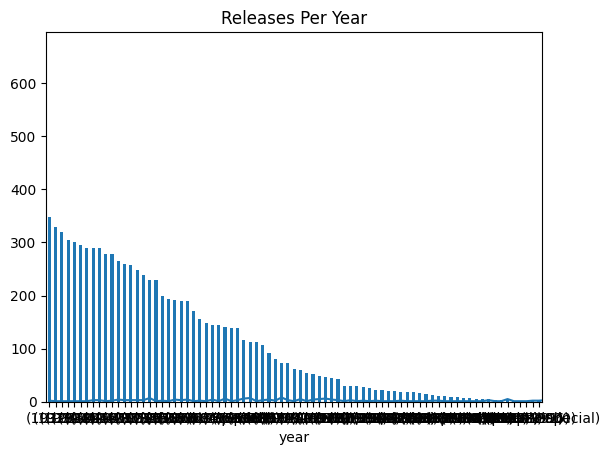

In [ ]:
df['rating'].value_counts().plot(kind ='bar', title= 'Count Of  Ratings')
df['year'].value_counts().sort_index().plot(title ='Releases Per Year')

#step 7
#Top shows by votes or rating
#Number of votes helps to understand the audience with high engagement
#Rating help to know shows that are critically acclaimed

In [ ]:
df.sort_values(by='votes', ascending=False).head(10)

,title,year,certificate,duration,genre,rating,description,stars,votes
8661,JoJo's Bizarre Adventure,(2012– ),TV-MA,25 min,"Animation, Action, Adventure",9.0,While Bruno stays on the ground to fight again...,"['Bill Butts, ', 'Kellen Goff, ', 'Yûichi Naka...",999
3005,Life After Death with Tyler Henry,(2022– ),TV-MA,45 min,Reality-TV,5.9,"After years of being Hollywood's go-to medium,...","['Theresa Koelewyn, ', 'Tyler Henry, ', 'Lisa ...",998
6840,Mortified Nation,(2013),NaN,84 min,Documentary,7.3,Adults share their most embarrassing teenage w...,"['Michael Mayer', '| ', ' Stars:', 'Jenny B...",997
5039,Santana,(2020),TV-MA,106 min,"Action, Crime, Drama",3.8,"Two cops, two brothers. One is out for justice...","['Maradona Dias Dos Santos, ', 'Chris Roland',...",997
4923,Gie,(2005),Not Rated,147 min,"Biography, Drama",7.6,Soe Hok Gie is an activist who lived in the si...,"['Riri Riza', '| ', ' Stars:', 'Nicholas Sa...",997
8416,Warrior Nun,(2020– ),TV-MA,40 min,"Action, Drama, Fantasy",7.0,"After tasting the good life with JC, Ava crash...","['Jet Wilkinson', '| ', ' Stars:', 'Alba Ba...",997
9552,She-Ra and the Princesses of Power,(2018–2020),TV-Y7,24 min,"Animation, Action, Adventure",7.9,"Glimmer sends Adora, Perfuma, Bow and Huntara ...","['Roy Burdine, ', 'Mandy Clotworthy', '| ', ' ...",996
4304,Goedam,(2020– ),TV-MA,10 min,"Short, Horror, Mystery",5.7,"When night falls on the city, shadows and spir...","['Song Chae-Yoon, ', 'Han Su-ah, ', 'Shim So-Y...",995
4486,Opposites Attract,(2015),NaN,90 min,"Comedy, Romance",5.8,"She's a divorce lawyer, single mother and perp...","['Max Croci', '| ', ' Stars:', 'Luca Argent...",994
8468,JoJo's Bizarre Adventure,(2012– ),TV-MA,25 min,"Animation, Action, Adventure",9.0,"On the island of Sardinia, a boy named Doppio ...","['Griffin Burns, ', 'Shinshû Fuji, ', 'Kellen ...",994


#step: 8
#feature enjineering
#explore top/popular shows
#created a column for popular based on vote count
#created rating_level column: low, mid, high rated shows using `pd.cut()


In [ ]:
df['popular'] = np.where(df['votes']> 50000, "yes", "no")
df["rating_level"]= pd.cut(df['rating'], bins=[0, 5, 7, 10], labels=['low', 'mid', 'high'])

#step: 9
#In this step, we visualize key relationships and content trends in the Netflix dataset.

#What we’ll explore:
#The relationship between number of votes and average rating
#The most frequent genres in the dataset

#These charts help us understand how user engagement (votes) aligns with ratings and which types of content are most common.

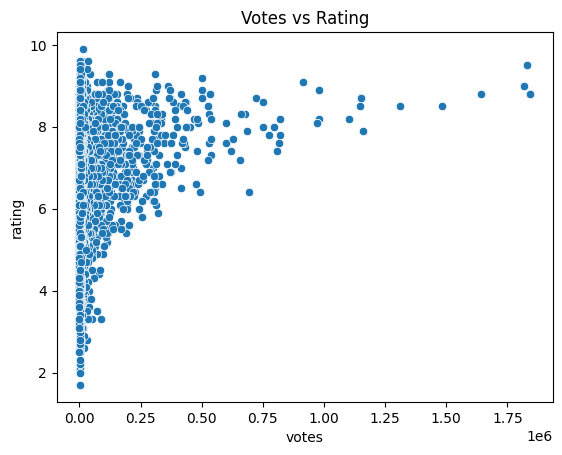

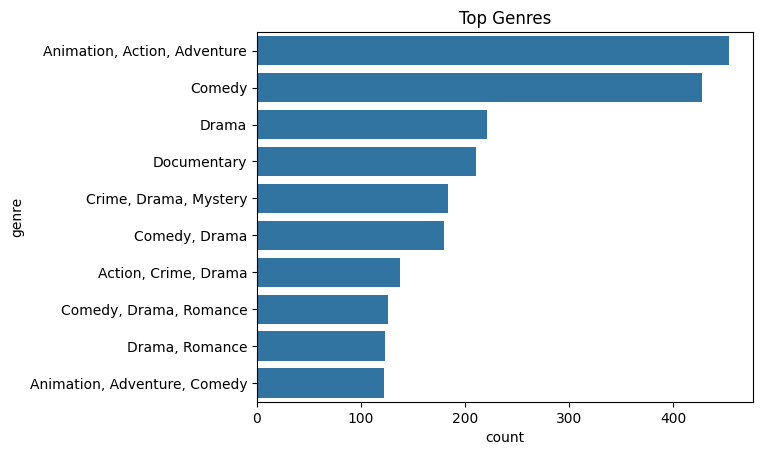

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rating vs Votes
sns.scatterplot(x="votes", y="rating", data=df)
plt.title("Votes vs Rating")
plt.show()

# Count by Genre
sns.countplot(y="genre", data=df, order=df["genre"].value_counts().index[:10])
plt.title("Top Genres")
plt.show()


#step: 10
#reloaded the cleaned, analyzed data as csv file

In [29]:
df.to_csv("netflix_cleaned.csv", index=False)